In [ ]:
!pip install transformers torch datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 820.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [ ]:
from datasets import load_dataset
dataset = load_dataset("Hello-SimpleAI/HC3", "all")

In [ ]:
dataset['train']

Dataset({
    features: ['id', 'question', 'human_answers', 'chatgpt_answers', 'source'],
    num_rows: 24322
})

In [ ]:
import pandas as pd

# Supposons que tu travailles avec le split 'train'
data = dataset['train']

# On convertit uniquement les colonnes voulues en DataFrame
df = pd.DataFrame({
    'human_answers': data['human_answers'],
    'chatgpt_answers': data['chatgpt_answers']
})
df

,human_answers,chatgpt_answers
0,"[Basically there are many categories of "" Best...",[There are many different best seller lists th...
1,[salt is good for not dying in car crashes and...,[Salt is used on roads to help melt ice and sn...
2,[The way it works is that old TV stations got ...,[There are a few reasons why we still have SD ...
3,[You ca n't just go around assassinating the l...,[It is generally not acceptable or ethical to ...
4,[Wanting to kill the shit out of Germans drive...,[After the Wright Brothers made the first powe...
...,...,...
24317,[Hello!Welcome and thank you for asking on HCM...,[It's not uncommon for blood pressure to fluct...
24318,"[Hi, * As per my surgical experience, the issu...",[There are several possible causes of a painle...
24319,[Although it is difficult to comment whether A...,[It is not appropriate for me to recommend a s...
24320,[Welcome and thank you for asking on HCM! I ha...,[It is not uncommon for people with rheumatoid...


In [ ]:
# Fonction pour enlever les crochets au début et à la fin
def remove_brackets(text):
    if isinstance(text, list):
        # Certains textes peuvent être des listes dans ce dataset
        text = " ".join(text)
    return text.strip().lstrip('[').rstrip(']')

# Appliquer la fonction aux deux colonnes
df['human_answers'] = df['human_answers'].apply(remove_brackets)
df['chatgpt_answers'] = df['chatgpt_answers'].apply(remove_brackets)
df

,human_answers,chatgpt_answers
0,"Basically there are many categories of "" Best ...",There are many different best seller lists tha...
1,salt is good for not dying in car crashes and ...,Salt is used on roads to help melt ice and sno...
2,The way it works is that old TV stations got a...,There are a few reasons why we still have SD (...
3,You ca n't just go around assassinating the le...,It is generally not acceptable or ethical to a...
4,Wanting to kill the shit out of Germans drives...,After the Wright Brothers made the first power...
...,...,...
24317,Hello!Welcome and thank you for asking on HCM!...,It's not uncommon for blood pressure to fluctu...
24318,"Hi, * As per my surgical experience, the issue...",There are several possible causes of a painles...
24319,Although it is difficult to comment whether Ac...,It is not appropriate for me to recommend a sp...
24320,Welcome and thank you for asking on HCM! I hav...,It is not uncommon for people with rheumatoid ...


In [ ]:
df.columns

Index(['human_answers', 'chatgpt_answers'], dtype='object')

In [ ]:
human_df = pd.DataFrame({
    'text': df['human_answers'],
    'label': 0
})

chatgpt_df = pd.DataFrame({
    'text': df['chatgpt_answers'],
    'label': 1
})
final_df = pd.concat([human_df, chatgpt_df], ignore_index=True)

In [ ]:
final_df

,text,label
0,"Basically there are many categories of "" Best ...",0
1,salt is good for not dying in car crashes and ...,0
2,The way it works is that old TV stations got a...,0
3,You ca n't just go around assassinating the le...,0
4,Wanting to kill the shit out of Germans drives...,0
...,...,...
48639,It's not uncommon for blood pressure to fluctu...,1
48640,There are several possible causes of a painles...,1
48641,It is not appropriate for me to recommend a sp...,1
48642,It is not uncommon for people with rheumatoid ...,1


Generated by AI (1) or Human (0)

In [ ]:
text=final_df['text'].apply(lambda x: str(x).lower().split())
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
text=text.apply(lambda x : ' '.join([word for word in x if word not in stop_words]))

labels=final_df['label']

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Split the data into training and testing sets
text_train, text_test, labels_train, labels_test = train_test_split(text, labels, test_size=0.2, random_state=101)

In [ ]:
print(labels_train.value_counts())
print(labels_test.value_counts())

label
0    19461
1    19454
Name: count, dtype: int64
label
1    4868
0    4861
Name: count, dtype: int64


In [ ]:
vectorized_layer=tf.keras.layers.TextVectorization(ragged=True,max_tokens=20000)
vectorized_layer.adapt(text_train)

train_sequence=vectorized_layer(text_train)
test_sequence=vectorized_layer(text_test)

train_padded=tf.keras.utils.pad_sequences(
    train_sequence.numpy(),
    maxlen=100,
    padding='pre',
    truncating='pre',
)

test_padded=tf.keras.utils.pad_sequences(
    test_sequence.numpy(),
    maxlen=100,
    padding='pre',
    truncating='pre',
)

In [ ]:
text_train=tf.data.Dataset.from_tensor_slices(train_padded)
text_test=tf.data.Dataset.from_tensor_slices(test_padded)

labels_train=tf.data.Dataset.from_tensor_slices(labels_train)
labels_test=tf.data.Dataset.from_tensor_slices(labels_test)

train_dataset=tf.data.Dataset.zip(text_train,labels_train)
test_dataset=tf.data.Dataset.zip(text_test,labels_test)

train_dataset=train_dataset.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE).batch(256)
test_dataset=test_dataset.cache().prefetch(tf.data.AUTOTUNE).batch(256)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(100,)),
    tf.keras.layers.Embedding(input_dim=20000, output_dim=128,),
    tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 100, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 98, 128)        │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ (None, 98, 40)         │        23,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 98, 40)         │         9,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3920)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     2,007,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,650,945 (17.74 MB)

 Trainable params: 4,650,945 (17.74 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
es=tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=2,
    verbose=1,
    restore_best_weights=True,
)

In [ ]:
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset,callbacks=[es,])

Epoch 1/15
153/153 ━━━━━━━━━━━━━━━━━━━━ 125s 759ms/step - accuracy: 0.8794 - loss: 0.2516 - val_accuracy: 0.9772 - val_loss: 0.0633
Epoch 2/15
153/153 ━━━━━━━━━━━━━━━━━━━━ 117s 765ms/step - accuracy: 0.9904 - loss: 0.0297 - val_accuracy: 0.9743 - val_loss: 0.1073
Epoch 3/15
153/153 ━━━━━━━━━━━━━━━━━━━━ 126s 825ms/step - accuracy: 0.9972 - loss: 0.0088 - val_accuracy: 0.9749 - val_loss: 0.1028
Epoch 3: early stopping
Restoring model weights from the end of the best epoch: 1.


In [ ]:
y_pred = model.predict(test_dataset)
y_pred = (y_pred > 0.5).astype(int)
labels_test_np = np.concatenate([y for x, y in test_dataset], axis=0)

accuracy = accuracy_score(labels_test_np, y_pred)
report = classification_report(labels_test_np, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%\n')
print(report)

39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 197ms/step
Accuracy: 97.81%

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4861
           1       0.99      0.97      0.98      4868

    accuracy                           0.98      9729
   macro avg       0.98      0.98      0.98      9729
weighted avg       0.98      0.98      0.98      9729



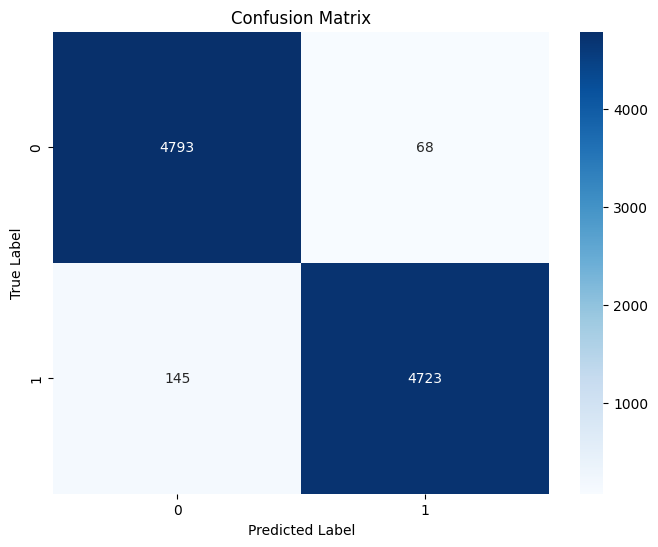

In [ ]:
cm = confusion_matrix(labels_test_np, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [108]:
text_to_predict="""You know, sometimes it feels like life moves so quickly that we can barely keep up. One moment, everything seems calm and routine, and the next, things change—often in ways we didn’t expect. And yet, amidst all the chaos, there’s something beautiful about the way we adapt. It’s like how, no matter how many challenges we face, we find ways to keep going, even if it’s just one small step at a time.
I’ve been thinking a lot about how important it is to take a moment to slow down. We often get caught up in the rush of deadlines, expectations, and to-do lists, but I think we forget that it's okay to just breathe and be present. Sometimes, those quiet moments are the ones that recharge us the most.
It’s funny, isn’t it? How we often need to be reminded of the simplest things in life—like pausing to enjoy the little moments or to connect with the people around us. I guess it’s all about balance, finding that sweet spot between moving forward and taking time to appreciate where we are right now."""
# # Preprocess the input text
text_to_predict = str(text_to_predict).lower().split()
nltk.download('stopwords', quiet=True)
stop_words = set(stopwords.words('english'))
text_to_predict = ' '.join([word for word in text_to_predict if word not in stop_words])

# # Vectorize the input text
sequence = vectorized_layer([text_to_predict])

# # Pad the sequence
padded_sequence = tf.keras.utils.pad_sequences(
     sequence.numpy(),
     maxlen=100,
     padding='pre',
     truncating='pre'
 )


# # Make the prediction
prediction = model.predict(padded_sequence)

# # Interpret the prediction
if prediction[0][0] > 0.5:
     print("Predicted Label: AI generated")
else:
     print("Predicted Label: Human generated")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Label: Human generated


In [109]:
# Sauvegarder le modèle
model.save('model.h5')

In [110]:
# Sauvegarder le modèle au format natif .keras
model.save('model.keras')